In [45]:
import os
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

k_value = tf.constant(3)

data_point = tf.constant([2., 3.])

dataset = tf.constant([[1, 1], [1, 4], [1, 5], [2, 2],[2, 3], [2, 5], [4, 3], [5, 1]],
                      dtype=tf.float32)

neg_one = tf.constant(-1.0, dtype=tf.float32)
distance = tf.reduce_sum(tf.abs(tf.subtract(dataset, data_point)), 1)
print(dataset)
print(distance)


tf.Tensor(
[[1. 1.]
 [1. 4.]
 [1. 5.]
 [2. 2.]
 [2. 3.]
 [2. 5.]
 [4. 3.]
 [5. 1.]], shape=(8, 2), dtype=float32)
tf.Tensor([3. 2. 3. 1. 0. 2. 2. 5.], shape=(8,), dtype=float32)


In [22]:
neg_distance = tf.math.scalar_mul(neg_one, distance)
neg_distance

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-3., -2., -3., -1., -0., -2., -2., -5.], dtype=float32)>

In [53]:
# val, val_index = tf.nn.top_k(neg_distance, k_value)
val, val_index = tf.math.top_k(neg_distance, k_value)
val_index

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 3, 1])>

In [54]:
nearest_neighbors = tf.gather(dataset, val_index)
nearest_neighbors

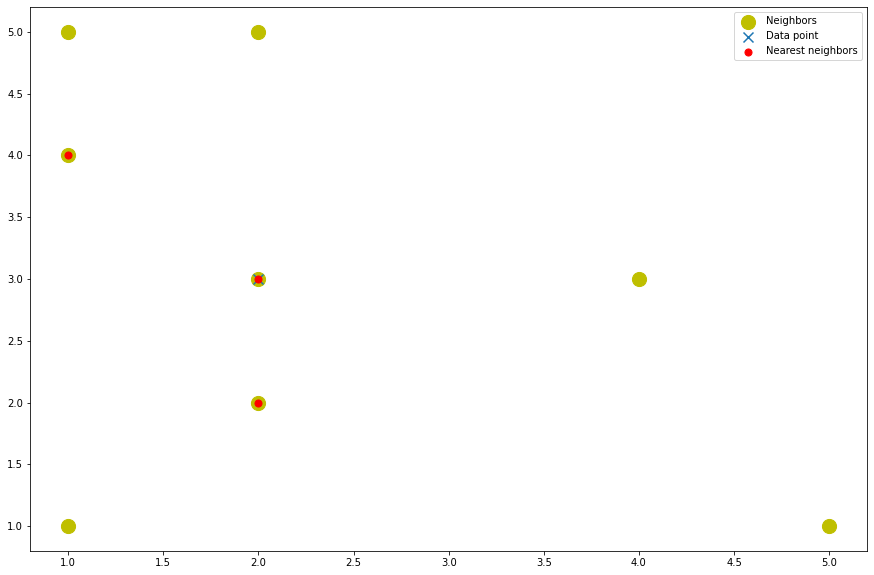

In [109]:
#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(15,10))
plt.scatter(dataset[:,0], dataset[:,1], label="Neighbors", marker="o",c="y", s=200)
plt.scatter(data_point[0],data_point[1], label="Data point", marker = "x", s=100)
plt.scatter(nearest_neighbors[:,0],nearest_neighbors[:,1], label="Nearest neighbors", marker="o",c="r", s=50)
plt.legend()
plt.show()